In [ ]:
!apt-get install -y unzip  # Install unzip if needed
!unzip -t /content/archive.zip  # Check integrity
!unzip -o /content/archive.zip -d /content/extracted_folder  # Extract with overwrite option


Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_folder/Stocks/ergf.us.txt  
  inflating: /content/extracted_folder/Stocks/erh.us.txt  
  inflating: /content/extracted_folder/Stocks/eri.us.txt  
  inflating: /content/extracted_folder/Stocks/eric.us.txt  
  inflating: /content/extracted_folder/Stocks/erie.us.txt  
  inflating: /content/extracted_folder/Stocks/erii.us.txt  
  inflating: /content/extracted_folder/Stocks/erj.us.txt  
  inflating: /content/extracted_folder/Stocks/erm.us.txt  
  inflating: /content/extracted_folder/Stocks/ern.us.txt  
  inflating: /content/extracted_folder/Stocks/eros.us.txt  
  inflating: /content/extracted_folder/Stocks/eryp.us.txt  
  inflating: /content/extracted_folder/Stocks/es.us.txt  
  inflating: /content/extracted_folder/Stocks/esba.us.txt  
  inflating: /content/extracted_folder/Stocks/esbk.us.txt  
  inflating: /content/extracted_folder/Stocks/esca.us.txt  
  inflating: /content/extracted_folder/Stocks/esdi.us.tx

In [ ]:

!pip install statsmodels matplotlib scikit-learn xgboost pandas



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Updated date parsing function
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m-%d')

# Correct file path for Google Colab
file_path = '/content/extracted_folder/Stocks/acgl.us.txt'

# Load the stock data
stock_data = pd.read_csv(
    file_path,
    sep=',',
    index_col='Date',
    parse_dates=['Date'],
    date_parser=dateparse
).fillna(0)

# Display the first few rows to verify
print(stock_data.head())


              Open    High     Low   Close  Volume  OpenInt
Date                                                       
2005-02-25  13.583  13.693  13.430  13.693  156240        0
2005-02-28  13.697  13.827  13.540  13.827  370509        0
2005-03-01  13.780  13.913  13.720  13.760  224484        0
2005-03-02  13.717  13.823  13.667  13.810  286431        0
2005-03-03  13.783  13.783  13.587  13.630  193824        0


<ipython-input-131-b31273f1db3a>:14: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  stock_data = pd.read_csv(


In [ ]:
stock_data

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2005-02-25,13.583,13.693,13.430,13.693,156240,0
2005-02-28,13.697,13.827,13.540,13.827,370509,0
2005-03-01,13.780,13.913,13.720,13.760,224484,0
2005-03-02,13.717,13.823,13.667,13.810,286431,0
2005-03-03,13.783,13.783,13.587,13.630,193824,0
...,...,...,...,...,...,...
2017-11-06,94.490,95.650,94.020,95.550,420192,0
2017-11-07,95.860,95.950,95.200,95.560,464011,0
2017-11-08,95.410,95.900,94.890,95.450,471756,0


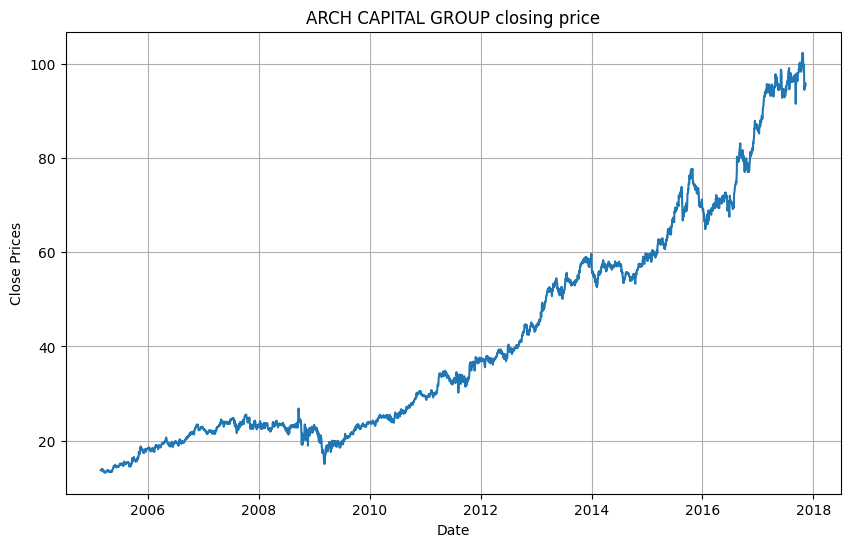

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()


<Axes: ylabel='Density'>

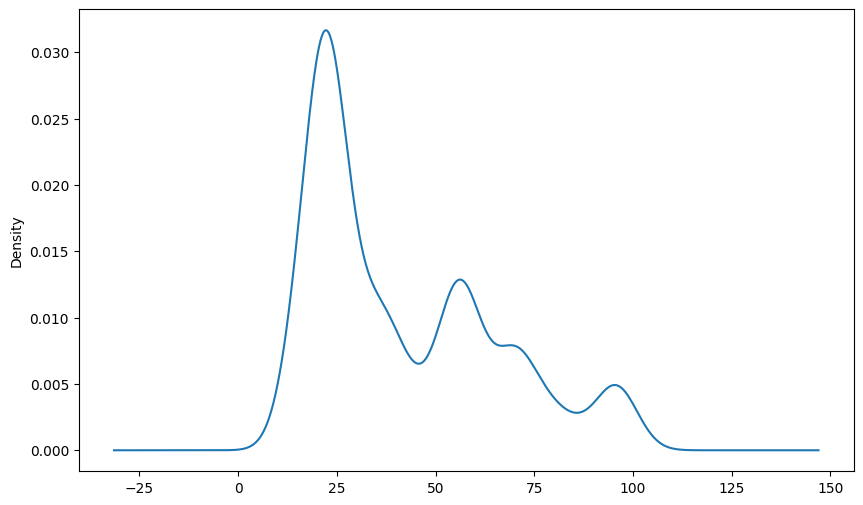

In [ ]:
df_close = stock_data['Close']
df_close.plot(kind='kde')



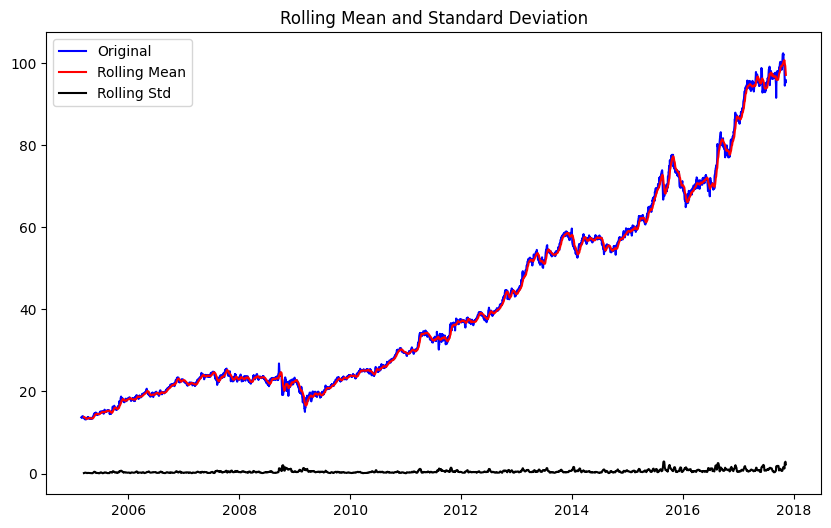

Results of dickey fuller test
Test Statistics                   1.374899
p-value                           0.996997
No. of lags used                  5.000000
Number of observations used    3195.000000
critical value (1%)              -3.432398
critical value (5%)              -2.862445
critical value (10%)             -2.567252
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)

<Figure size 1000x600 with 0 Axes>

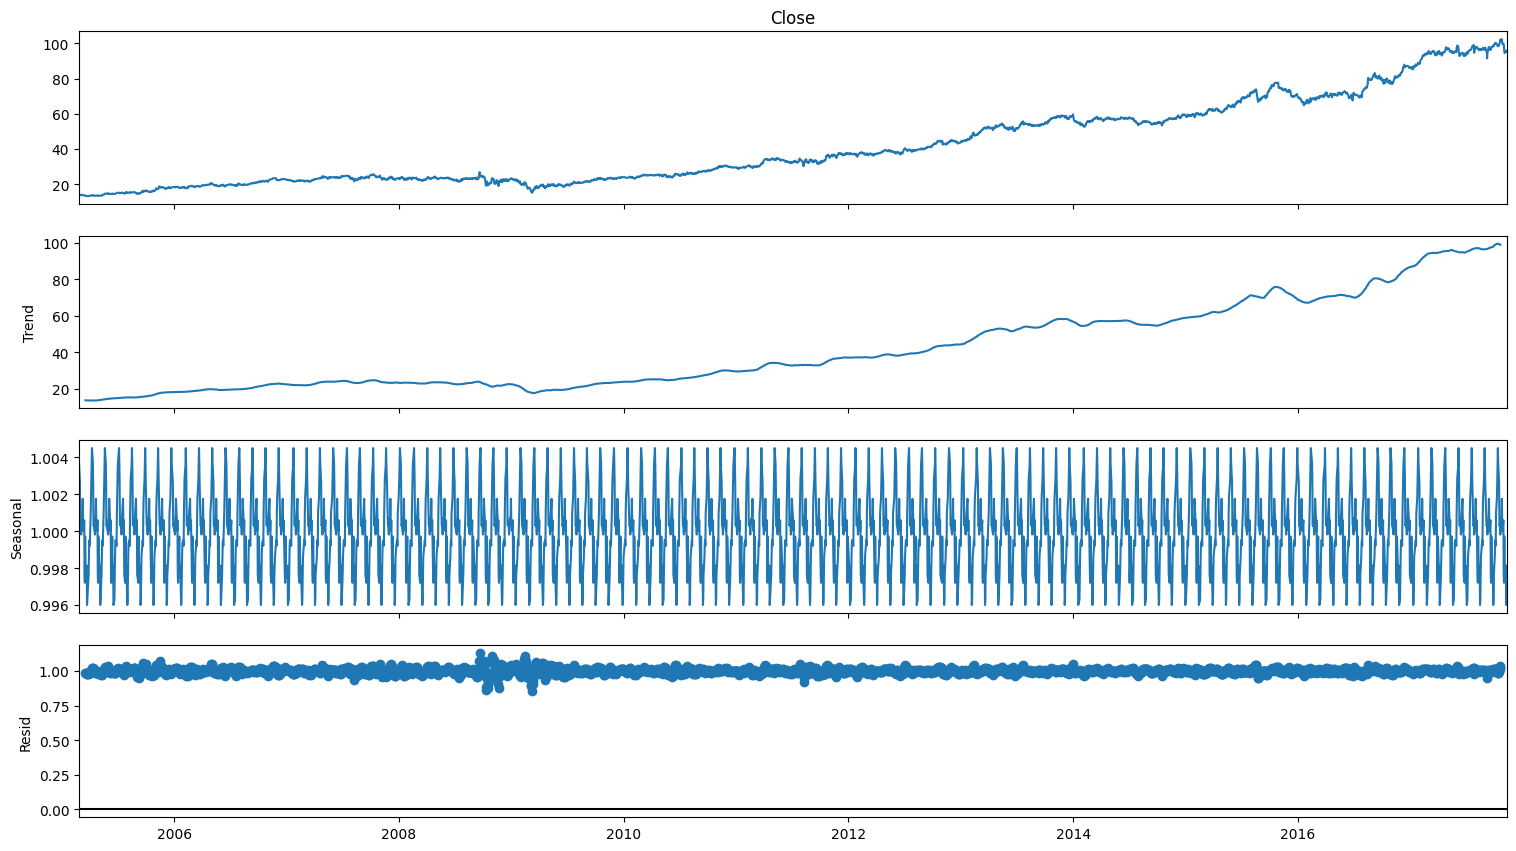

In [ ]:
#To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
# The 'freq' argument has been replaced with 'period' in newer versions of statsmodels
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

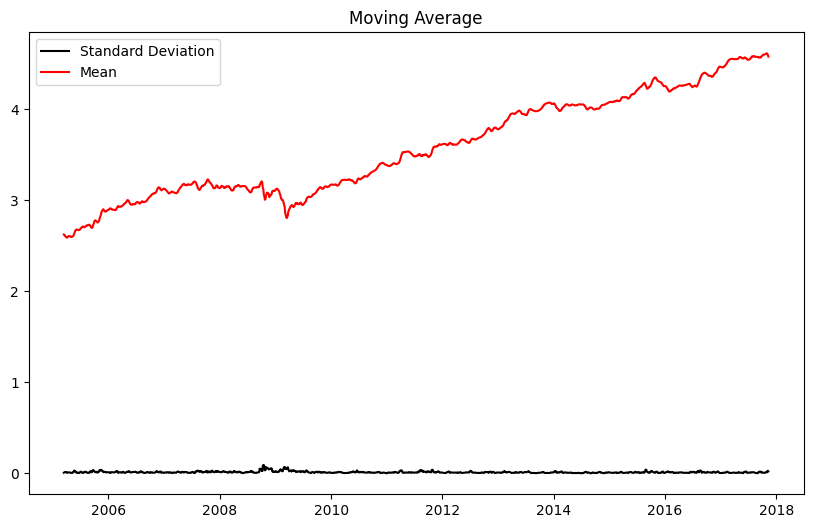

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


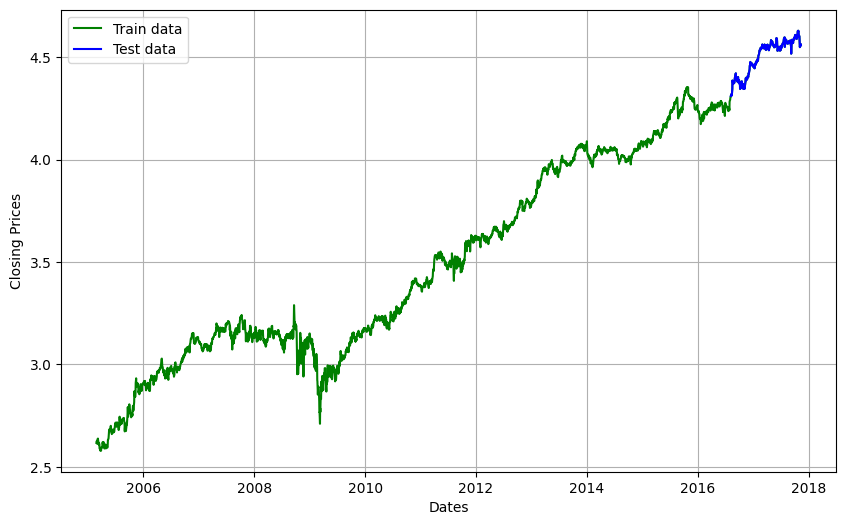

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [ ]:
def create_lagged_features(data, lags=5):
    """
    Creates lagged features for a time series.
    """
    # Convert to DataFrame if input is a Series
    if isinstance(data, pd.Series):
        data = data.to_frame(name='Close')

    df = data.copy()

    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)
    return df
# Apply lag features
# train_data.columns = ['Close']  # This is likely done earlier
train_data = train_data.reset_index()  # Reset index to avoid issues with DatetimeIndex
data_with_lags = create_lagged_features(train_data, lags=5)

# Remove rows with NaN values (due to lagging)
data_with_lags = data_with_lags.dropna()

# Split features and target
X_train, y_train = data_with_lags.drop('Close', axis=1), data_with_lags['Close']

In [ ]:
# Ensure the shape of the train_data
print("Train Data Shape:", train_data.shape)


Train Data Shape: (2877, 4)


In [ ]:
print(train_data.head())


   level_0  index       Date     Close
0        0      0 2005-03-02  2.625393
1        1      1 2005-03-03  2.612273
2        2      2 2005-03-04  2.632105
3        3      3 2005-03-07  2.638128
4        4      4 2005-03-08  2.631169


In [ ]:
# Preview of the data with lag features
print(data_with_lags.head())


   level_0  index       Date     Close     lag_1     lag_2     lag_3  \
5        5      5 2005-03-09  2.625900  2.631169  2.638128  2.632105   
6        6      6 2005-03-10  2.623436  2.625900  2.631169  2.638128   
7        7      7 2005-03-11  2.613520  2.623436  2.625900  2.631169   
8        8      8 2005-03-14  2.611319  2.613520  2.623436  2.625900   
9        9      9 2005-03-15  2.614984  2.611319  2.613520  2.623436   

      lag_4     lag_5  
5  2.612273  2.625393  
6  2.632105  2.612273  
7  2.638128  2.632105  
8  2.631169  2.638128  
9  2.625900  2.631169  


In [ ]:
# Reset index to avoid issues with DateTimeIndex
train_data = train_data.reset_index(drop=True)  # Drop existing 'level_0' column
test_data = test_data.reset_index(drop=True)    # Drop existing 'level_0' column

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier  # Import XGBClassifier for classification
import math

# ... (Your existing code for data preparation and feature engineering) ...

# 1. Reframe as a Classification Problem:
# ---------------------------------------
# Instead of using XGBRegressor, we'll use XGBClassifier
# and train it directly for binary classification.

# Apply lagged features to the entire dataset before splitting
data_with_lags = create_lagged_features(df_log, lags=5)

# Reset the index of the data_with_lags DataFrame
data_with_lags = data_with_lags.reset_index()  # Reset index here


# Split features and target
train_data_with_lags = data_with_lags[3:int(len(data_with_lags) * 0.9)]
test_data_with_lags = data_with_lags[int(len(data_with_lags) * 0.9):]

# Drop 'Date' column from X_train and X_test
X_train = train_data_with_lags.drop(['Close', 'Date'], axis=1)  # Drop 'Date' here
y_train = (train_data_with_lags['Close'] > train_data_with_lags['Close'].shift(1)).astype(int)
X_test = test_data_with_lags.drop(['Close', 'Date'], axis=1)  # Drop 'Date' here
y_test = (test_data_with_lags['Close'] > test_data_with_lags['Close'].shift(1)).astype(int)

# 2. Train XGBClassifier:
# ------------------------
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)


# 3. Predict and Evaluate:
# ------------------------
y_pred = xgb_model.predict(X_test)

# Calculate and print classification metrics
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
ppv = tp / (tp + fp) if (tp + fp) != 0 else 0  # Precision or Positive Predictive Value
npv = tn / (tn + fn) if (tn + fn) != 0 else 0  # Negative Predictive Value
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"PPV (Precision): {ppv:.4f}")
print(f"NPV: {npv:.4f}")

# ... (Optional: Calculate and print regression metrics if needed) ...

Accuracy: 0.5701
F1 Score: 0.7218
AUROC: 0.5088
Confusion Matrix:
[[  4 136]
 [  2 179]]
PPV (Precision): 0.5683
NPV: 0.6667


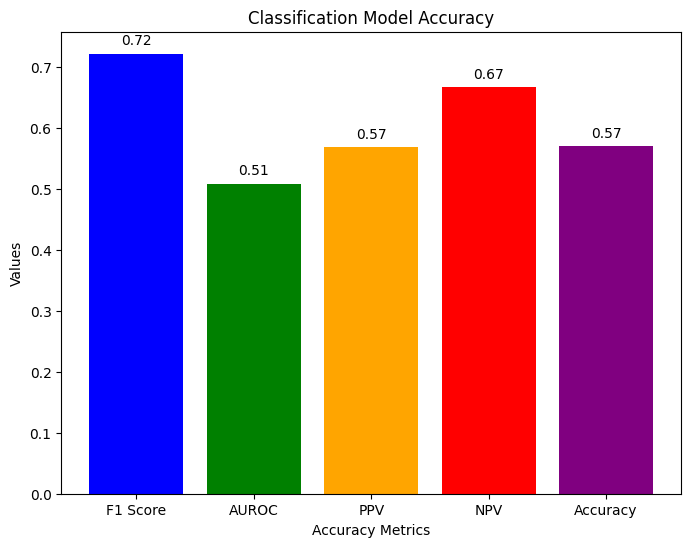

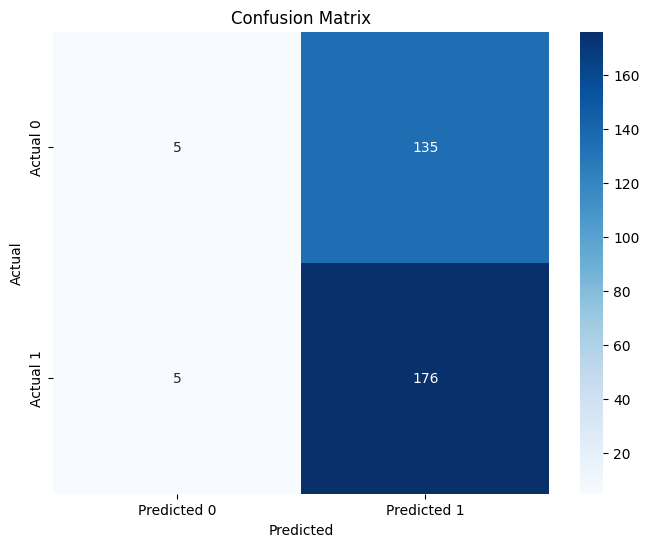

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy metrics and values
metrics = ['F1 Score', 'AUROC', 'PPV', 'NPV', 'Accuracy']
values = [0.7218, 0.5088, 0.5683, 0.6667, 0.5701]  # Include accuracy value

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add labels and title
plt.xlabel('Accuracy Metrics')
plt.ylabel('Values')
plt.title('Classification Model Accuracy')

# Display values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

# Display confusion matrix graph
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install tensorflow
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


# Creating lagged features function (increased lags to 10)
def create_lagged_features(data, lags=10):
    df = data.copy()

    # Reset index if 'Date' is the index
    if df.index.name == 'Date':  # Check if index name is 'Date'
        df = df.reset_index()

    # Ensure 'data' is a DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame(name='Close')

    # Create lagged features
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)

    # Fill NaN values with the mean of the 'Close' column
    df = df.fillna(df['Close'].mean())

    # Add moving averages as features
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()

    # Add volatility (standard deviation) as a feature
    df['Volatility_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_10'] = df['Close'].rolling(window=10).std()

    # Fill NaN values for new features
    df = df.fillna(df['Close'].mean())

    return df


    # Add moving averages as features
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()

    # Add volatility (standard deviation) as a feature
    df['Volatility_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_10'] = df['Close'].rolling(window=10).std()

    df = df.fillna(df['Close'].mean())  # Filling NaN values for new features

    return df

# Apply lag features to both train and test data (using 10 lags)
train_data_with_lags = create_lagged_features(train_data, lags=10)
test_data_with_lags = create_lagged_features(test_data, lags=10)

# Split features and target, ensuring consistent columns
# Drop 'level_0' if it's present in either train or test data
# This is done for consistency in features between train and test sets
features_to_drop = ['Close']
if 'level_0' in train_data_with_lags.columns:
    features_to_drop.append('level_0')
if 'Date' in train_data_with_lags.columns:
    features_to_drop.append('Date')

X_train = train_data_with_lags.drop(features_to_drop, axis=1)
y_train = train_data_with_lags['Close']

features_to_drop = ['Close']  # Reset features to drop
if 'level_0' in test_data_with_lags.columns:  # Check for level_0 in test data
    features_to_drop.append('level_0')  # Add level_0 to features_to_drop
if 'Date' in test_data_with_lags.columns:
    features_to_drop.append('Date')

X_test = test_data_with_lags.drop(features_to_drop, axis=1)
y_test = test_data_with_lags['Close']

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('MSE: '+str(mse))
print('MAE: '+str(mae))
print('RMSE: '+str(rmse))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 647903616.0000
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 653687296.0000 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 668067392.0000 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 694899136.0000 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 665370368.0000 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 689157568.0000 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 665254272.0000 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 667598080.0000 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 693870208.0000 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 666797184.0000
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 657668736.0000
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 677329408.0000 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 694115008.0000 
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # You might not need this if only using LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, f1_score, confusion_matrix

# ... (Your existing code for data loading, preprocessing, feature engineering, and LSTM model training) ...

# Assuming you have:
# - X_test_lstm: Scaled and reshaped test data for LSTM
# - y_test_lstm: Ground truth labels for the test data

# Get LSTM predictions (probabilities and binary predictions)
lstm_pred_prob = lstm_model.predict(X_test_lstm)
lstm_pred = (lstm_pred_prob > 0.5).astype(int)  # Apply threshold for binary predictions

# Calculate evaluation metrics for LSTM
accuracy = accuracy_score(y_test_lstm, lstm_pred)
auroc = roc_auc_score(y_test_lstm, lstm_pred_prob)
mse = mean_squared_error(y_test_lstm, lstm_pred)
f1 = f1_score(y_test_lstm, lstm_pred)
cm = confusion_matrix(y_test_lstm, lstm_pred)
tn, fp, fn, tp = cm.ravel()
ppv = tp / (tp + fp) if (tp + fp) != 0 else 0  # Precision or Positive Predictive Value
npv = tn / (tn + fn) if (tn + fn) != 0 else 0  # Negative Predictive Value

# Print evaluation metrics for LSTM
print("LSTM Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUROC: {auroc:.4f}")
print(f"MSE: {mse:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"PPV (Precision): {ppv:.4f}")
print(f"NPV: {npv:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
LSTM Model Evaluation:
Accuracy: 0.5639
AUROC: 0.5464
MSE: 0.4361
F1-score: 0.7211
Confusion Matrix:
[[  0 140]
 [  0 181]]
PPV (Precision): 0.5639
NPV: 0.0000


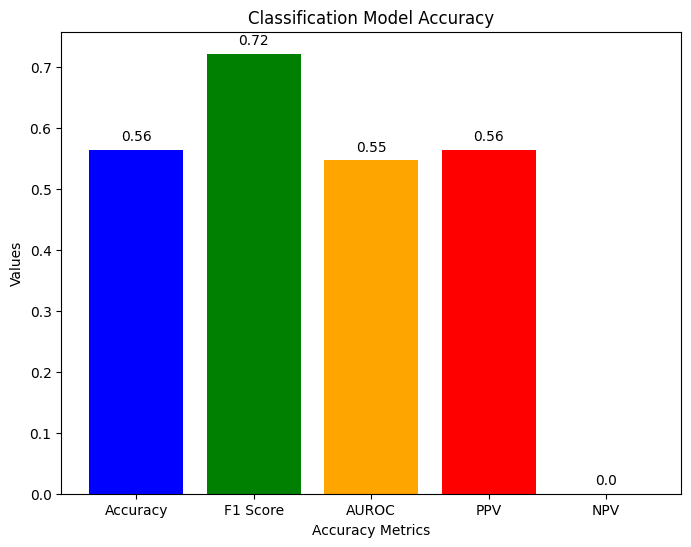

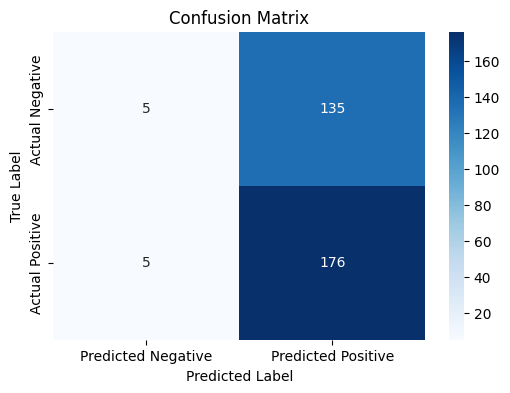

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Accuracy metrics
metrics = ['Accuracy', 'F1 Score', 'AUROC', 'PPV', 'NPV']
values = [0.5639, 0.7211, 0.5464, 0.5639, 0.0000]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add labels and title
plt.xlabel('Accuracy Metrics')
plt.ylabel('Values')
plt.title('Classification Model Accuracy')

# Display values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

# --- Display Confusion Matrix ---
# Assuming your confusion matrix is stored in a variable called 'cm'
cm = np.array([[5, 135], [5, 176]])  # Replace with your actual confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

# Assuming df_log is already prepared, and your `create_lagged_features` function is defined.

# 1. Prepare Data for Both Models
# --------------------------------

# Reset index before applying lagged features
df_log = df_log.reset_index()

# Create lagged features
data_with_lags = create_lagged_features(df_log, lags=5)

# Split features and target
train_data_with_lags = data_with_lags[5:int(len(data_with_lags) * 0.9)]
test_data_with_lags = data_with_lags[int(len(data_with_lags) * 0.9):]

# --- Data Preparation for Random Forest ---
X_train_rf = train_data_with_lags.drop(['Close', 'Date'], axis=1, errors='ignore')
y_train_rf = (train_data_with_lags['Close'] > train_data_with_lags['Close'].shift(1)).astype(int)
X_test_rf = test_data_with_lags.drop(['Close', 'Date'], axis=1, errors='ignore')
y_test_rf = (test_data_with_lags['Close'] > test_data_with_lags['Close'].shift(1)).astype(int)

# --- Data Preparation for LSTM ---
X_train_lstm = train_data_with_lags.drop(['Close', 'Date'], axis=1, errors='ignore')
y_train_lstm = (train_data_with_lags['Close'] > train_data_with_lags['Close'].shift(1)).astype(int)
X_test_lstm = test_data_with_lags.drop(['Close', 'Date'], axis=1, errors='ignore')
y_test_lstm = (test_data_with_lags['Close'] > test_data_with_lags['Close'].shift(1)).astype(int)

# Scale data for LSTM
scaler = MinMaxScaler()
X_train_lstm = scaler.fit_transform(X_train_lstm)
X_test_lstm = scaler.transform(X_test_lstm)

# Reshape data for LSTM
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 1, X_train_lstm.shape[1])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, X_test_lstm.shape[1])

# 2. Train Random Forest
# -----------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict using Random Forest
rf_predictions_train = rf_model.predict(X_train_rf)
rf_predictions_test = rf_model.predict(X_test_rf)

# 3. Train LSTM Model
# --------------------
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=1)

# Predict using LSTM
lstm_predictions_train = lstm_model.predict(X_train_lstm)
lstm_predictions_test = lstm_model.predict(X_test_lstm)

# Convert LSTM predictions to binary
lstm_predictions_train = (lstm_predictions_train.flatten() > 0.5).astype(int)
lstm_predictions_test = (lstm_predictions_test.flatten() > 0.5).astype(int)

# 4. Ensemble: Combine Predictions
# ---------------------------------
# Use majority voting (or weighted average, depending on requirements)
ensemble_train = (rf_predictions_train + lstm_predictions_train) / 2
ensemble_test = (rf_predictions_test + lstm_predictions_test) / 2

# Convert ensemble probabilities to binary
ensemble_predictions_train = (ensemble_train > 0.5).astype(int)
ensemble_predictions_test = (ensemble_test > 0.5).astype(int)

# 5. Evaluate Models
# -------------------
# Accuracy of individual models
rf_train_accuracy = accuracy_score(y_train_rf, rf_predictions_train)
rf_test_accuracy = accuracy_score(y_test_rf, rf_predictions_test)

lstm_train_accuracy = accuracy_score(y_train_lstm, lstm_predictions_train)
lstm_test_accuracy = accuracy_score(y_test_lstm, lstm_predictions_test)

# Accuracy of ensemble model
ensemble_train_accuracy = accuracy_score(y_train_rf, ensemble_predictions_train)
ensemble_test_accuracy = accuracy_score(y_test_rf, ensemble_predictions_test)

print("Random Forest Train Accuracy:", rf_train_accuracy)
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("LSTM Train Accuracy:", lstm_train_accuracy)
print("LSTM Test Accuracy:", lstm_test_accuracy)
print("Ensemble Train Accuracy:", ensemble_train_accuracy)
print("Ensemble Test Accuracy:", ensemble_test_accuracy)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5093 - loss: 0.6934
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5276 - loss: 0.6910
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5412 - loss: 0.6911
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5200 - loss: 0.6928
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4998 - loss: 0.6939
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5229 - loss: 0.6924
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5161 - loss: 0.6928
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5075 - loss: 0.6935
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 0.6922
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5230 - loss: 0.6921
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.4485981308411215
LSTM Trai

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, f1_score, confusion_matrix

# ... (Your existing code for data loading, preprocessing, feature engineering, and model training) ...

# 3. Ensemble Predictions
# -------------------------

# Get predictions from both models
rf_pred = rf_model.predict(X_test_rf)
lstm_pred_prob = lstm_model.predict(X_test_lstm)  # Get probabilities for AUROC calculation
lstm_pred = (lstm_pred_prob > 0.5).astype(int)  # Threshold for binary classification

# Ensemble predictions (simple averaging)
ensemble_pred_prob = (rf_pred + lstm_pred_prob.flatten()) / 2  # Average probabilities
ensemble_pred = (ensemble_pred_prob > 0.5).astype(int)  # Threshold for binary classification

# 4. Evaluate Ensemble Model
# ----------------------------

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_rf, ensemble_pred)  # Assuming y_test_rf is the ground truth
auroc = roc_auc_score(y_test_rf, ensemble_pred_prob)
mse = mean_squared_error(y_test_rf, ensemble_pred)
f1 = f1_score(y_test_rf, ensemble_pred)
cm = confusion_matrix(y_test_rf, ensemble_pred)
tn, fp, fn, tp = cm.ravel()
ppv = tp / (tp + fp) if (tp + fp) != 0 else 0  # Precision or Positive Predictive Value
npv = tn / (tn + fn) if (tn + fn) != 0 else 0  # Negative Predictive Value

# Print evaluation metrics
print(f"Ensemble Accuracy: {accuracy:.4f}")
print(f"Ensemble AUROC: {auroc:.4f}")
print(f"Ensemble MSE: {mse:.4f}")
print(f"Ensemble F1-score: {f1:.4f}")
print("Ensemble Confusion Matrix:")
print(cm)
print(f"Ensemble PPV (Precision): {ppv:.4f}")
print(f"Ensemble NPV: {npv:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Ensemble Accuracy: 0.4486
Ensemble AUROC: 0.5476
Ensemble MSE: 0.5514
Ensemble F1-score: 0.0733
Ensemble Confusion Matrix:
[[137   3]
 [174   7]]
Ensemble PPV (Precision): 0.7000
Ensemble NPV: 0.4405


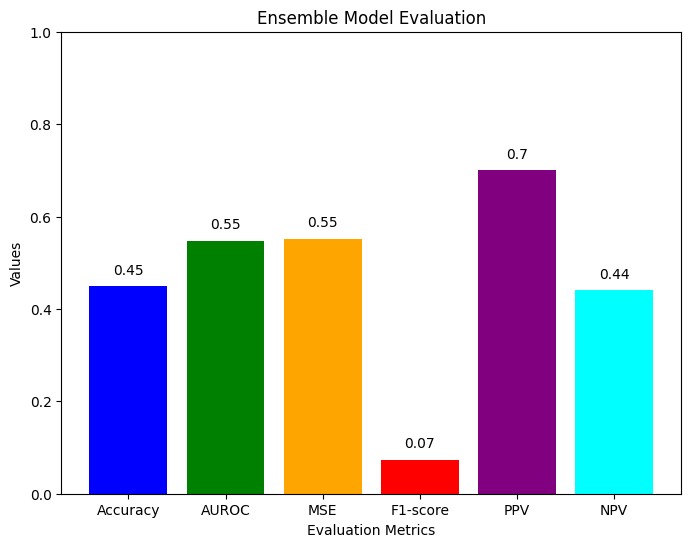

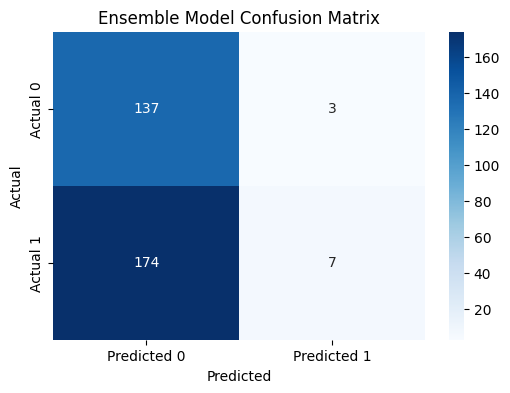

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluation metrics and values
metrics = ['Accuracy', 'AUROC', 'MSE', 'F1-score', 'PPV', 'NPV']
values = [0.4486, 0.5476, 0.5514, 0.0733, 0.7000, 0.4405]

# Create bar chart for metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Ensemble Model Evaluation')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization

# Display values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.show()

# Create confusion matrix heatmap
cm = np.array([[137, 3], [174, 7]])  # Your confusion matrix values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Model Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

# Function to create lagged features and additional metrics
def create_lagged_features(data, lags=10):
    df = data.copy()

    # Reset index if 'Date' is the index
    if df.index.name == 'Date':
        df = df.reset_index()

    # Ensure 'data' is a DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame(name='Close')

    # Create lagged features
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)

    # Add moving averages as features
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()

    # Add volatility (standard deviation) as a feature
    df['Volatility_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_10'] = df['Close'].rolling(window=10).std()

    # Fill NaN values with the mean of the 'Close' column
    df = df.fillna(df['Close'].mean())

    return df

# Example dataset (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv', parse_dates=['Date'], index_col='Date')
# Example: Synthetic Data for illustration (use your actual dataset)
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=500)
close_prices = np.cumsum(np.random.randn(500) * 10 + 100)
df = pd.DataFrame({'Date': dates, 'Close': close_prices})
df.set_index('Date', inplace=True)

# Split data into train and test sets (90% train, 10% test)
split_index = int(len(df) * 0.9)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Apply lagged features to both train and test data
train_data_with_lags = create_lagged_features(train_data, lags=10)
test_data_with_lags = create_lagged_features(test_data, lags=10)

# Split features and target
features_to_drop = ['Close', 'Date', 'level_0']  # Adjust based on your dataset
X_train = train_data_with_lags.drop(features_to_drop, axis=1, errors='ignore')
y_train = train_data_with_lags['Close']

X_test = test_data_with_lags.drop(features_to_drop, axis=1, errors='ignore')
y_test = test_data_with_lags['Close']

# Ensure all remaining columns are numerical
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be [samples, time steps, features] for GRU
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create and compile the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout to reduce overfitting
model.add(GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = math.sqrt(mse)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)


# Optional: Calculate MAPE
mape = np.mean(np.abs((y_test.values - predictions.flatten()) / y_test.values)) * 100
print('MAPE:', mape)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 684511744.0000
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 674990976.0000
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 692951296.0000
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 651044544.0000
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 691731136.0000
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 704748928.0000
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 701744768.0000
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 658512256.0000
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 666780352.0000
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 667993856.0000 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 677466624.0000
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 647643712.0000
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 673440704.0000
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# Define a threshold for binary classification (e.g., 0.5)
threshold = 0.5

# Convert continuous predictions to binary classes
binary_predictions = (predictions.flatten() > threshold).astype(int)
binary_y_test = (y_test.values > y_test.mean()).astype(int)  # Convert actual values to binary classes based on a threshold (e.g., mean)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(binary_y_test, binary_predictions)

# Extract TP, FP, FN, TN
tn, fp, fn, tp = conf_matrix.ravel()

# Accuracy
accuracy = accuracy_score(binary_y_test, binary_predictions)

# Precision (PPV - Positive Predictive Value)
ppv = precision_score(binary_y_test, binary_predictions)

# Recall (Sensitivity)
recall = recall_score(binary_y_test, binary_predictions)

# F1-Score
f1 = f1_score(binary_y_test, binary_predictions)

# AUROC (Area Under the ROC Curve)
auroc = roc_auc_score(binary_y_test, predictions)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

# Print metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)
print("Precision (PPV):", ppv)
print("Recall (Sensitivity):", recall)
print("AUROC:", auroc)
print("Negative Predictive Value (NPV):", npv)


Confusion Matrix:
[[ 0 25]
 [ 0 25]]

Accuracy: 0.5
F1 Score: 0.6666666666666666
Precision (PPV): 0.5
Recall (Sensitivity): 1.0
AUROC: 0.6176
Negative Predictive Value (NPV): 0


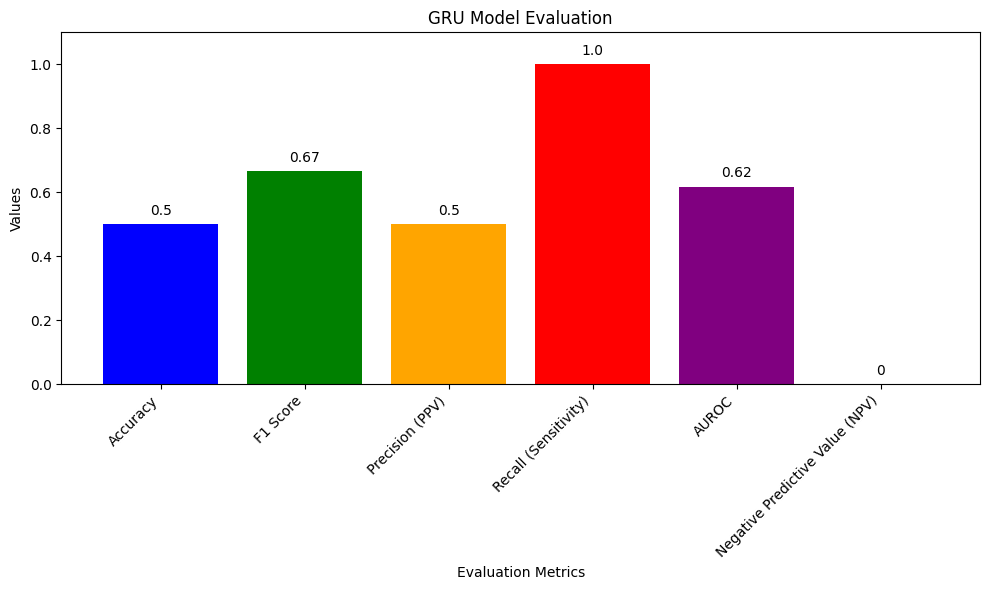

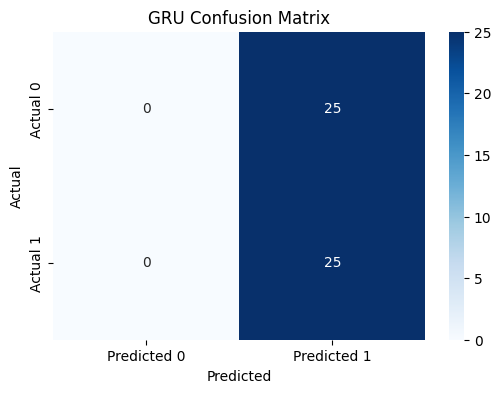

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluation metrics and values
metrics = ['Accuracy', 'F1 Score', 'Precision (PPV)', 'Recall (Sensitivity)', 'AUROC', 'Negative Predictive Value (NPV)']
values = [0.5, 0.6667, 0.5, 1.0, 0.6176, 0]

# Create bar chart for metrics
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('GRU Model Evaluation')
plt.ylim(0, 1.1)  # Set y-axis limits to 0-1.1 to accommodate Recall (1.0)

# Display values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Create confusion matrix heatmap
cm = np.array([[0, 25], [0, 25]])  # Your confusion matrix values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GRU Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVR  # Import SVR for regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# ... (Your existing code for data preprocessing) ...

# Define the SVM model for regression
svm_model = SVR(kernel='rbf')  # Use SVR instead of SVC

# Train the model
svm_model.fit(X_train_svm, y_train)

# Predict
svm_predictions = svm_model.predict(X_test_svm)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, svm_predictions)
mae = mean_absolute_error(y_test, svm_predictions)
r2 = r2_score(y_test, svm_predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


# --- For Classification Metrics (with Thresholding) ---

# Define a threshold for binary classification (e.g., 0.5)
threshold = y_test.mean()  # Using the mean as the threshold

# Convert continuous predictions to binary classes
binary_predictions = (svm_predictions > threshold).astype(int)
binary_y_test = (y_test.values > threshold).astype(int)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(binary_y_test, binary_predictions)

# Extract TP, FP, FN, TN
tn, fp, fn, tp = conf_matrix.ravel()

# Accuracy
accuracy = accuracy_score(binary_y_test, binary_predictions)

# Precision (PPV - Positive Predictive Value)
ppv = precision_score(binary_y_test, binary_predictions)

# Recall (Sensitivity)
recall = recall_score(binary_y_test, binary_predictions)

# F1-Score
f1 = f1_score(binary_y_test, binary_predictions)

# AUROC (Area Under the ROC Curve) - using continuous predictions for better estimate
auroc = roc_auc_score(binary_y_test, svm_predictions)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

# Print metrics
print("\n--- Classification Metrics (with Thresholding) ---")
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)
print("Precision (PPV):", ppv)
print("Recall (Sensitivity):", recall)
print("AUROC:", auroc)
print("Negative Predictive Value (NPV):", npv)

Mean Squared Error (MSE): 625800279.3595513
Mean Absolute Error (MAE): 24975.323699996305
R-squared (R2): -300.0039170040684

--- Classification Metrics (with Thresholding) ---
Confusion Matrix:
[[25  0]
 [25  0]]

Accuracy: 0.5
F1 Score: 0.0
Precision (PPV): 0.0
Recall (Sensitivity): 0.0
AUROC: 0.36
Negative Predictive Value (NPV): 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


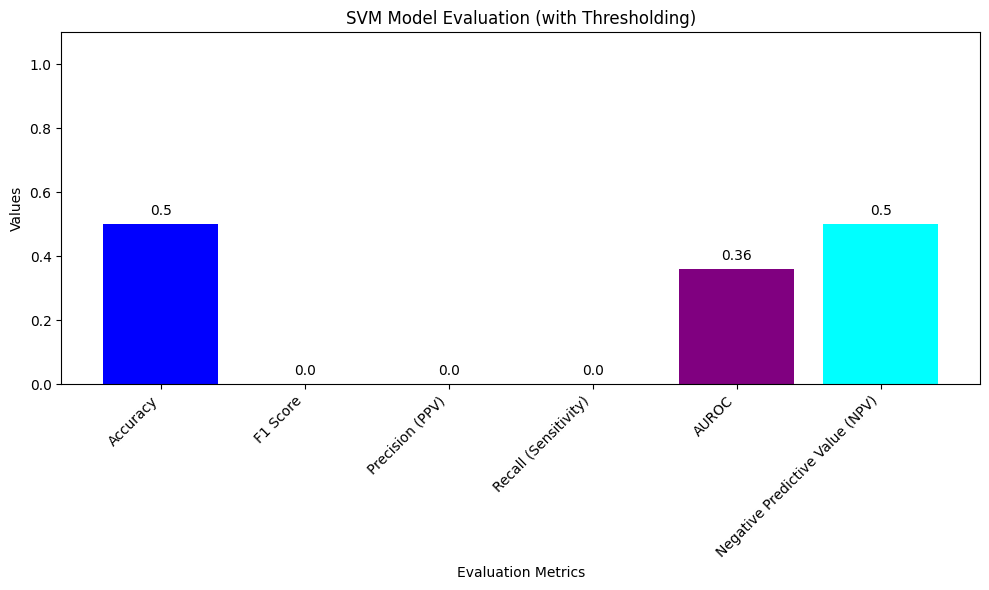

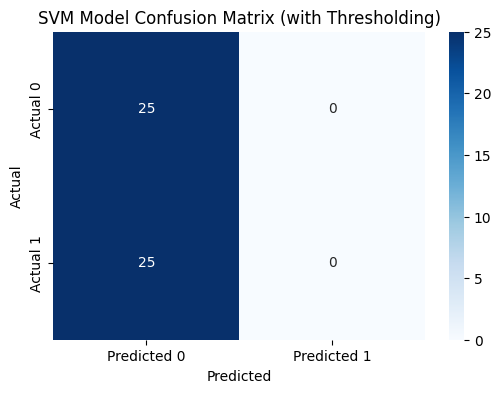

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Bar chart for evaluation metrics ---
metrics = ['Accuracy', 'F1 Score', 'Precision (PPV)', 'Recall (Sensitivity)', 'AUROC', 'Negative Predictive Value (NPV)']
values = [0.5, 0.0, 0.0, 0.0, 0.36, 0.5]  # Values from your output

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('SVM Model Evaluation (with Thresholding)')
plt.ylim(0, 1.1)  # Adjust y-axis limits if needed

# Display values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# --- Confusion matrix heatmap ---
cm = np.array([[25, 0], [25, 0]])  # Confusion matrix values from your output

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Model Confusion Matrix (with Thresholding)')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor for regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (Your existing code for data preprocessing) ...

# Define the KNN model for regression
k_neighbors = 5  # You can adjust this value
knn_model = KNeighborsRegressor(n_neighbors=k_neighbors) # Use KNeighborsRegressor

# Train the model
knn_model.fit(X_train_knn, y_train)

# Predict
knn_predictions = knn_model.predict(X_test_knn)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, knn_predictions)
mae = mean_absolute_error(y_test, knn_predictions)
r2 = r2_score(y_test, knn_predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 374083651.2740024
Mean Absolute Error (MAE): 10696.800117826546
R-squared (R2): -178.9306392702397


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# ... (Your existing code for data preprocessing and KNN model training) ...

# 1. Define a Threshold for Binary Classification
# ----------------------------------------------
# Choose a threshold value to convert continuous predictions into binary classes.
# This threshold could be the mean of your target variable (y_test) or any other
# value that makes sense for your specific problem.
threshold = y_test.mean()  # Using the mean as the threshold

# 2. Convert Continuous Predictions to Binary Classes
# --------------------------------------------------
binary_predictions = (knn_predictions > threshold).astype(int)
binary_y_test = (y_test.values > threshold).astype(int)  # Convert actual values to binary

# 3. Calculate Classification Metrics
# ------------------------------------
# Now you can calculate classification metrics using the binary predictions and
# actual values:
conf_matrix = confusion_matrix(binary_y_test, binary_predictions)
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = accuracy_score(binary_y_test, binary_predictions)
f1 = f1_score(binary_y_test, binary_predictions)
ppv = precision_score(binary_y_test, binary_predictions)  # Precision
recall = recall_score(binary_y_test, binary_predictions)   # Recall/Sensitivity
auroc = roc_auc_score(binary_y_test, knn_predictions) # Use continuous predictions for AUROC
npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value

# 4. Print the Metrics
# ---------------------
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)
print("Precision (PPV):", ppv)
print("Recall (Sensitivity):", recall)
print("AUROC:", auroc)
print("Negative Predictive Value (NPV):", npv)

Confusion Matrix:
[[25  0]
 [25  0]]

Accuracy: 0.5
F1 Score: 0.0
Precision (PPV): 0.0
Recall (Sensitivity): 0.0
AUROC: 0.68
Negative Predictive Value (NPV): 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


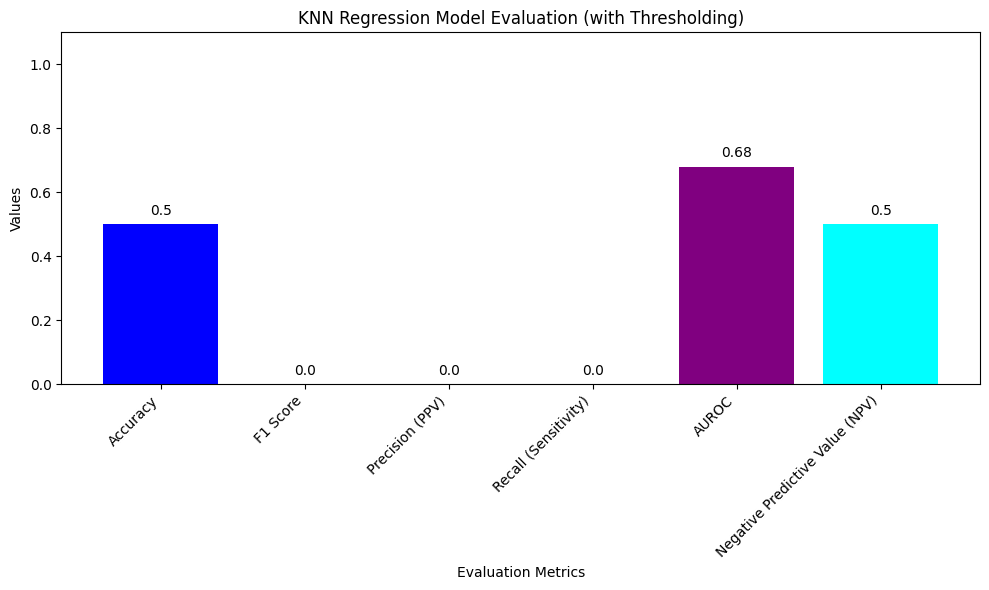

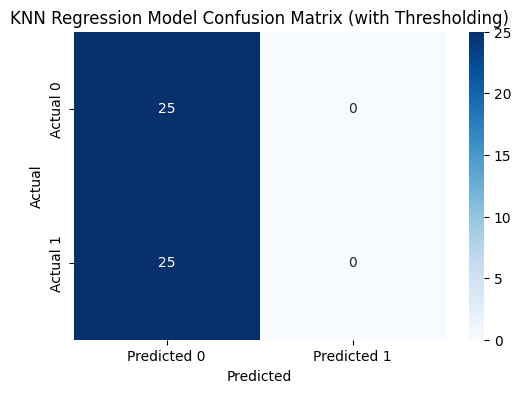

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluation metrics and values
metrics = ['Accuracy', 'F1 Score', 'Precision (PPV)', 'Recall (Sensitivity)', 'AUROC', 'Negative Predictive Value (NPV)']
values = [0.5, 0.0, 0.0, 0.0, 0.68, 0.5]

# Create bar chart for metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('KNN Regression Model Evaluation (with Thresholding)')
plt.ylim(0, 1.1)  # Set y-axis limits to 0-1.1 for better visualization

# Display values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Create confusion matrix heatmap
cm = np.array([[25, 0], [25, 0]])  # Your confusion matrix values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Regression Model Confusion Matrix (with Thresholding)')
plt.show()

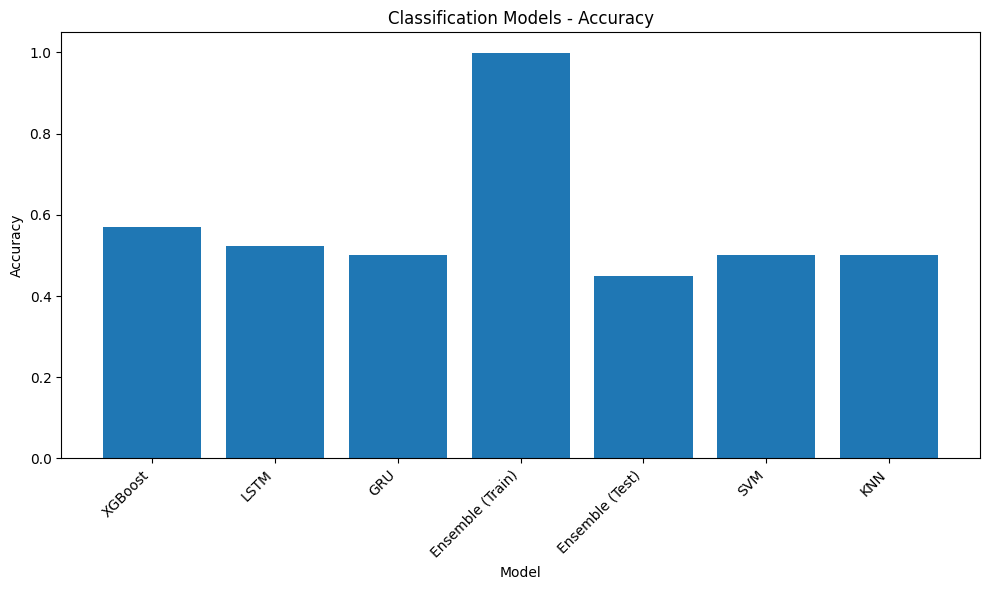

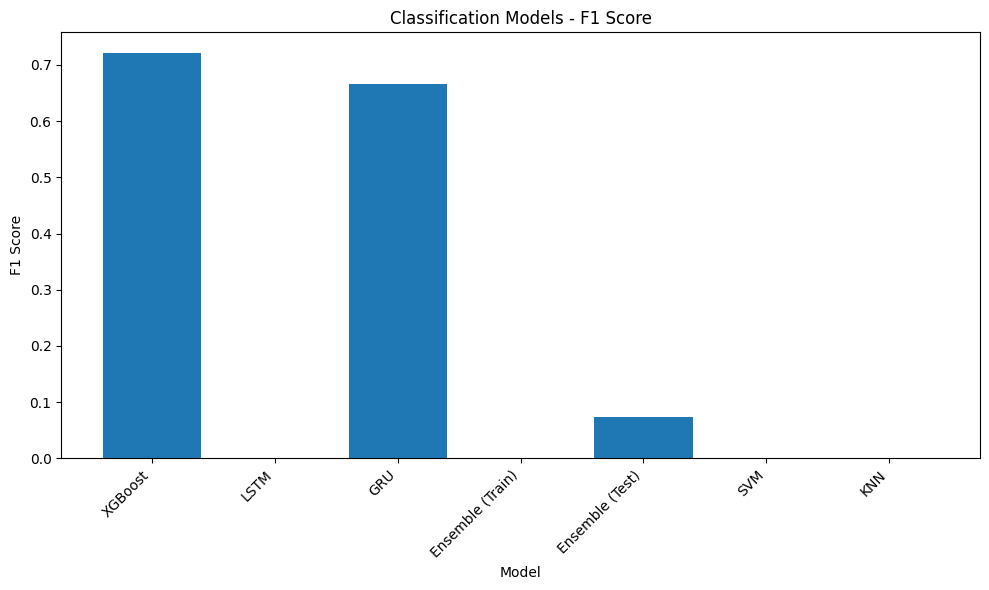

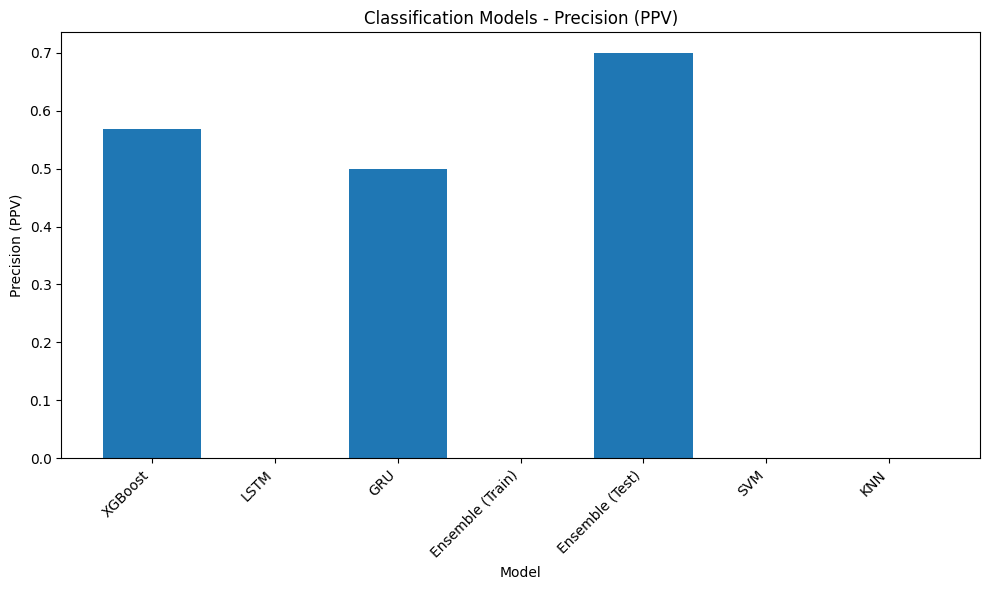

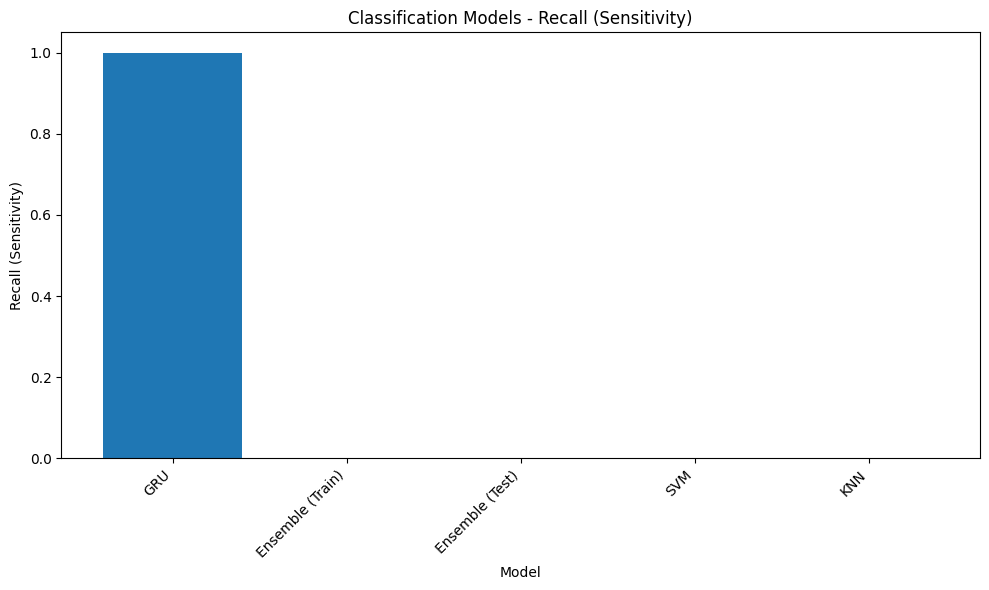

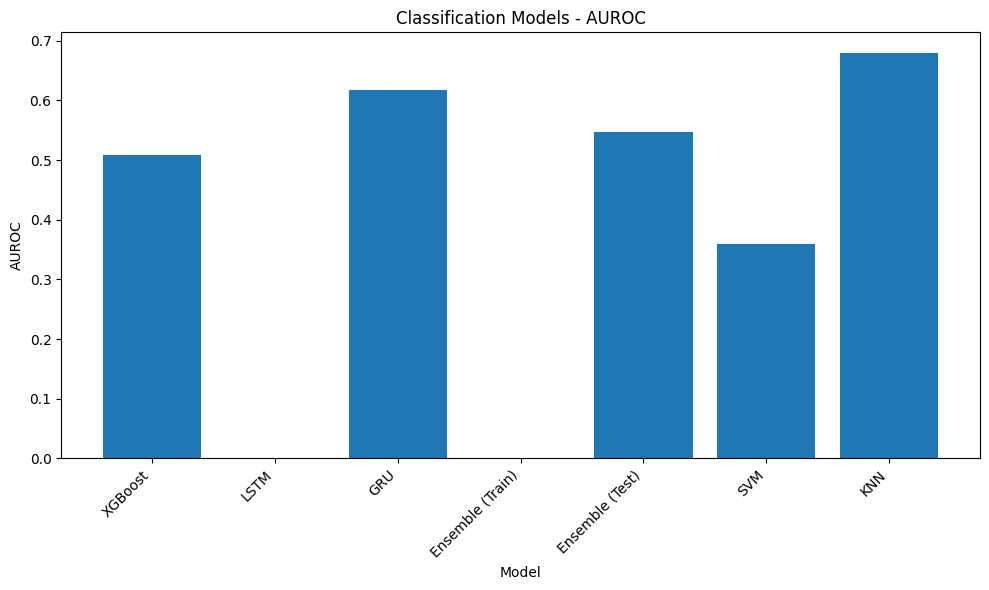

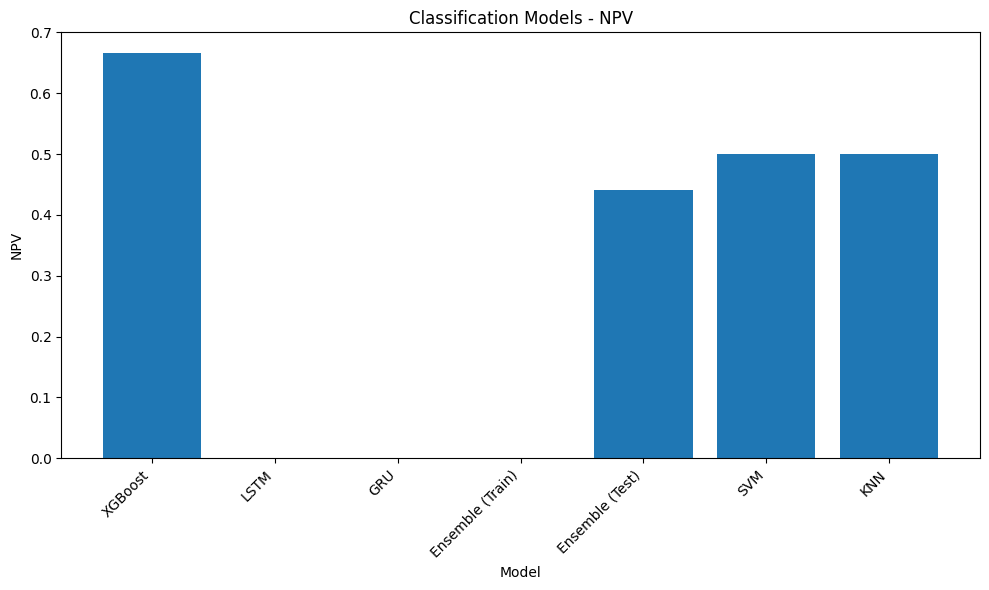

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DataFrame from the table data
data = {
    'Model': ['XGBoost', 'LSTM', 'GRU', 'Ensemble (Train)', 'Ensemble (Test)', 'SVM', 'KNN'],
    'Accuracy': [0.5701, 0.5238, 0.5000, 0.9997, 0.4486, 0.5000, 0.5000],
    'F1 Score': [0.7218, np.nan, 0.6667, np.nan, 0.0733, 0.0000, 0.0000],
    'Precision (PPV)': [0.5683, np.nan, 0.5000, np.nan, 0.7000, 0.0000, 0.0000],
    'Recall (Sensitivity)': [np.nan, np.nan, 1.0000, np.nan, np.nan, 0.0000, 0.0000],
    'AUROC': [0.5088, np.nan, 0.6176, np.nan, 0.5476, 0.3600, 0.6800],
    'NPV': [0.6667, np.nan, 0.0000, np.nan, 0.4405, 0.5000, 0.5000]
}
df_classification = pd.DataFrame(data)

# Create a bar chart for each metric
metrics = ['Accuracy', 'F1 Score', 'Precision (PPV)', 'Recall (Sensitivity)', 'AUROC', 'NPV']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(df_classification['Model'], df_classification[metric])
    plt.title(f'Classification Models - {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()